# KNN
# 1. Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Load Data

In [18]:
column_names = [
    "erythema", "scaling", "definite borders", "itching", "koebner phenomenon",
    "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement",
    "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate",
    "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges",
    "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess",
    "focal hypergranulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer",
    "spongiosis", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis",
    "inflammatory monoluclear inflitrate", "band-like infiltrate", "Age", "class"
]

dermatology_data = pd.read_csv('dermatology/dermatology.data', header=None, names=column_names)

# 3. Data Preprocessing
## 3.1 Data replace and fill missing values
- Replace the missing values with NaN
- Convert the 'Age' column to numeric
- Fill the missing values in 'Age' with the median age
- Drop the 'perifollicular parakeratosis' column(because all values are 0)

In [19]:
# Replacing the missing values with NaN
dermatology_data.replace("?", pd.NA, inplace=True)
dermatology_data['Age'] = pd.to_numeric(dermatology_data['Age'], errors='coerce')

# Filling the missing values in 'Age' with the median age
age_median = dermatology_data['Age'].median()
dermatology_data['Age'].fillna(age_median, inplace=True)

# Dropping the 'perifollicular parakeratosis' column
dermatology_data.drop('perifollicular parakeratosis', axis=1, inplace=True)

## 3.2 Data Scaling
I scaled the data using the min-max scaling method. This method scales the data to a fixed range - usually 0 to 1.
To get a more accurate result, I scaled the data after filling the missing values.
The formula I used for scaling the data is:

$$\[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\]$$

Where:
- \( x \): The original value.
- \( x' \): The scaled value.
- \( x_{min} \): The minimum value of the feature.
- \( x_{max} \): The maximum value of the feature.

In [20]:
dermatology_data_scaled = dermatology_data.copy()
for column in dermatology_data.columns[:-1]:
    col_min = dermatology_data[column].min()
    col_max = dermatology_data[column].max()
    dermatology_data_scaled[column] = (dermatology_data[column] - col_min) / (col_max - col_min)

## 3.2 Data Splitting
- Split the data into features and target
- Split the data into train and test sets

In [21]:
X = dermatology_data_scaled.drop('class', axis=1).values
y = dermatology_data_scaled['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. KNN algorithm
I used the Euclidean distance to calculate the distance between the test sample and the training samples.

The Euclidean distance is the straight-line distance between two points in Euclidean space. For points \( P \) and \( Q \), if the coordinates of \( P \) are \( (p_1, p_2, ..., p_n) \) and the coordinates of \( Q \) are \( (q_1, q_2, ..., q_n) \), then the Euclidean distance \( d \) between points \( P \) and \( Q \) can be calculated using the following formula:


$$\[
d(P, Q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2}
\]$$

Where:
- \( p_1, p_2, ..., p_n \): Coordinates of point \( P \) in an n-dimensional space.
- \( q_1, q_2, ..., q_n \): Coordinates of point \( Q \) in an n-dimensional space.
- \( n \): Dimension of the space.


In [22]:
class KNN:
    def __init__(self, k, test_sample, train_data, train_labels):
        """
        KnnClassifier to predict the class of a single test sample.
        :param k: Number of nearest neighbors to consider.
        :param test_sample: The test sample for which we want to predict the class.
        :param train_data: The training data set.
        :param train_labels: The labels of the training data set.
        """
        self.k = k
        self.test_sample = test_sample
        self.train_data = train_data
        self.train_labels = train_labels

    def euclidean_distance(self, sample1, sample2):
        """
        To calculate the euclidean distance between two samples.
        """
        return np.sqrt(np.sum((sample1 - sample2) ** 2))

    def predict(self):
        """
        To predict the class of the test sample.
        :return: The predicted class.
        """
        # This step calculates the euclidean distance between the test sample and all the training samples.
        distances = np.array([self.euclidean_distance(self.test_sample, train_sample) for train_sample in self.train_data])
        # This step sorts the distances in ascending order and returns the indices of the first k neighbors.
        k_nearest_indices = np.argsort(distances)[:self.k]
        # This step gets the labels of the k nearest neighbors.
        k_nearest_labels = self.train_labels[k_nearest_indices]
        prediction = np.argmax(np.bincount(k_nearest_labels))
        return prediction


# 5. Model Evaluation
# 5.1 Accuracy

I used the KNN algorithm to predict the class of each test sample, and then calculated the accuracy of the model.
The formula for accuracy is:

$$\[
Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}
\]$$

Where:
- Number of correct predictions: The number of test samples that were correctly predicted.
- Total number of predictions: The total number of test samples.
- Accuracy: The accuracy of the model.

In [23]:
predictions = []
for i in range(len(X_test)):
    knn = KNN(k=5, test_sample=X_test[i], train_data=X_train, train_labels=y_train)
    predictions.append(knn.predict())
    
accuracy = np.sum(predictions == y_test) / len(y_test) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 97.30%


# 5.2 Confusion Matrix

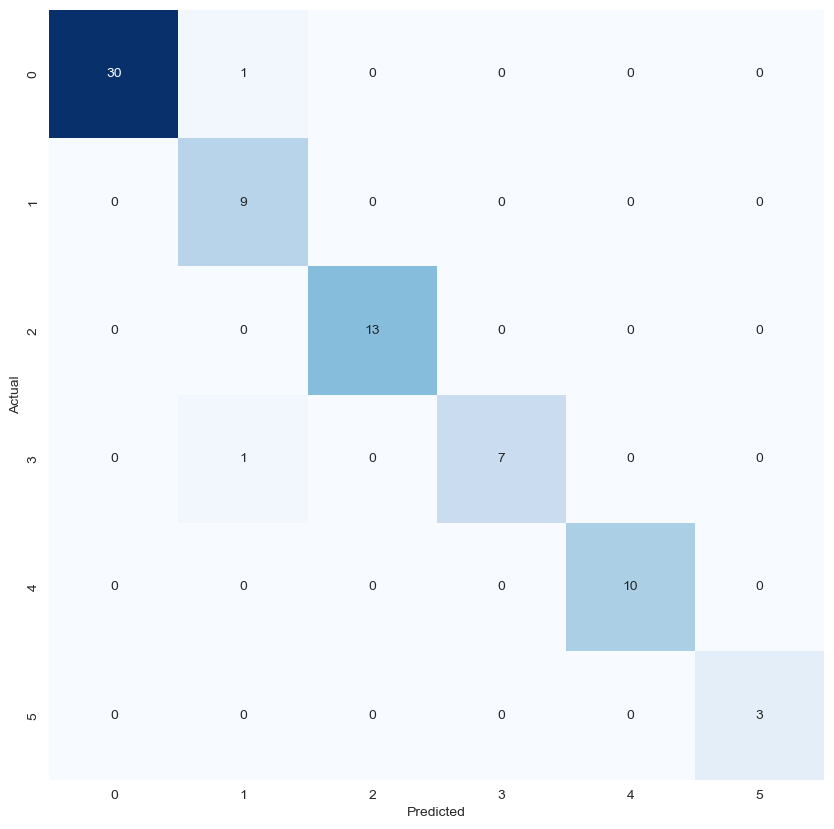

In [24]:
# 计算混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()